In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
os.getcwd()

'd:\\Running\\code'

In [5]:
os.chdir("d:\\Running\\")

In [58]:
# import the data file
df  = pd.read_csv("Activities.csv")

In [59]:
df

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Total Reps,Min Temp,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2024-09-07 15:13:23,False,Godawari Running,13.78,972,02:13:04,148,183,4.7,...,NaN,23.0,No,00:04:24.5,14,32.0,01:52:24,02:33:29,"1,393","1,918"
1,Running,2024-08-25 16:33:54,False,Kathmandu Running,5.88,433,01:15:41,124,164,2.9,...,NaN,24.0,No,00:10:03,6,30.0,00:49:30,01:55:39,"1,296","1,319"
2,Trail Running,2024-08-24 15:24:46,False,Lubhu Trail Running,12.43,786,01:54:29,138,178,3.6,...,NaN,26.0,No,00:02:08.1,13,31.0,01:42:34,02:12:21,"1,301","1,574"
3,Running,2024-08-21 17:25:15,False,Dhapakhel Running,2.12,198,00:43:55,110,145,1.2,...,NaN,23.0,No,00:01:48.0,3,27.0,00:17:47,00:46:08,"1,293","1,309"
4,Running,2024-08-20 20:29:09,False,Kathmandu Running,2.31,123,00:18:25,132,146,2.0,...,NaN,25.0,No,00:02:29.1,3,26.0,00:18:25,00:18:25,"1,299","1,307"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Running,2022-05-11 05:31:43,False,Kathmandu Running,10.04,534,01:00:19,152,178,3.9,...,NaN,--,No,00:00:13.1,11,NaN,01:00:17,01:00:19,"1,289","1,342"
756,Running,2022-05-10 05:33:29,False,Kathmandu Running,8.56,480,01:00:18,141,163,3.3,...,NaN,--,No,00:02:55.7,9,NaN,01:00:17,01:00:18,"1,302","1,341"
757,Running,2022-05-04 17:30:31,False,Kathmandu Running,6.48,423,00:53:12,139,151,2.9,...,NaN,--,No,00:03:52.8,7,NaN,00:53:11,00:53:12,"1,303","1,341"
758,Running,2022-05-03 17:57:16,False,Kathmandu Running,5.10,239,00:25:56,154,166,3.5,...,NaN,--,No,00:00:29.5,6,NaN,00:25:55,00:25:56,"1,312","1,327"


In [60]:
# check to see if all dates are there
# Step 1: Convert to datetime and check if all values are dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime, invalid parsing will be NaT
invalid_dates = df['Date'].isna().sum()

if invalid_dates > 0:
    print(f"There are {invalid_dates} invalid date(s) in the data.")
else:
    print("All values are valid dates.")

# Step 2: Sort the dates and calculate consecutive dates
df = df.sort_values(by='Date')
df['consecutive'] = df['Date'].diff().dt.days == 1  # Check if difference in days is 1

# Step 3: Count consecutive streaks
consecutive_streak = df['consecutive'].sum() + 1  # Add 1 for the first date in each streak
print(f"There are {consecutive_streak} consecutive dates.")

All values are valid dates.
There are 337 consecutive dates.


In [61]:
# Filter data between July 14, 2022 and April 28, 2023
mask_1 = df['Date'].between('2022-07-14', '2023-04-28')

# Filter data between August 14, 2023 and September 10, 2024
mask_2 = df['Date'].between('2023-08-14', '2024-09-08')

# Apply the filters
df_range_1 = df[mask_1]
df_range_2 = df[mask_2]

In [55]:
df_range_1['Date'] = df_range_1.index
df_range_2['Date'] = df_range_2.index


C:\Users\Saral\AppData\Local\Temp\ipykernel_9028\1086942780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_range_1['Date'] = df_range_1.index
C:\Users\Saral\AppData\Local\Temp\ipykernel_9028\1086942780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_range_2['Date'] = df_range_2.index


In [62]:
df_range_2

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Min Temp,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation,consecutive
413,Running,2023-08-14 05:50:44,False,Kaskarkando Running,7.41,368,00:42:44,153,189,3.4,...,--,No,00:04:18.0,5,NaN,00:42:44,00:42:44,147,157,False
412,Running,2023-08-15 05:50:06,False,Kaskarkando Running,3.37,188,00:22:22,144,159,2.6,...,--,No,00:01:39.5,3,NaN,00:21:52,00:22:22,147,159,False
411,Running,2023-08-15 06:20:11,False,Kaskarkando Running,2.01,112,00:12:04,153,169,2.4,...,--,No,00:02:27.4,2,NaN,00:12:04,00:12:04,151,159,False
410,Running,2023-08-16 18:41:35,False,Running,2.07,124,00:14:00,--,--,--,...,--,No,00:02:36.9,2,NaN,00:13:47,00:14:00,--,--,True
409,Treadmill Running,2023-08-17 18:29:23,False,Treadmill Running,2.10,118,00:13:14,148,167,2.4,...,--,No,00:00:37.8,3,NaN,00:13:06,00:13:14,--,--,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Running,2024-08-20 20:29:09,False,Kathmandu Running,2.31,123,00:18:25,132,146,2.0,...,25.0,No,00:02:29.1,3,26.0,00:18:25,00:18:25,"1,299","1,307",True
3,Running,2024-08-21 17:25:15,False,Dhapakhel Running,2.12,198,00:43:55,110,145,1.2,...,23.0,No,00:01:48.0,3,27.0,00:17:47,00:46:08,"1,293","1,309",False
2,Trail Running,2024-08-24 15:24:46,False,Lubhu Trail Running,12.43,786,01:54:29,138,178,3.6,...,26.0,No,00:02:08.1,13,31.0,01:42:34,02:12:21,"1,301","1,574",False
1,Running,2024-08-25 16:33:54,False,Kathmandu Running,5.88,433,01:15:41,124,164,2.9,...,24.0,No,00:10:03,6,30.0,00:49:30,01:55:39,"1,296","1,319",True


In [63]:
df_test = df_range_2.copy()
df_test_1 = df_range_1.copy()

In [65]:
df_test_1

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Min Temp,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation,consecutive
733,Running,2022-07-14 05:48:10,False,Dhangadhi Running,5.05,303,00:39:38,138,175,3.0,...,--,No,00:00:16.9,6,NaN,00:39:38,00:39:38,180,184,True
732,Running,2022-07-15 05:51:52,False,Kaskarkando Running,5.06,305,00:40:30,137,158,2.8,...,--,No,00:00:23.7,6,NaN,00:40:10,00:40:30,148,157,True
731,Running,2022-07-17 05:46:40,False,Kathmandu Running,1.02,58,00:07:19.6,142,174,1.7,...,--,No,00:00:05.9,2,NaN,00:07:19.6,00:07:19.6,"1,313","1,327",True
730,Running,2022-08-16 05:52:31,False,Kathmandu Running,5.60,276,00:32:59,148,180,4.1,...,--,No,00:03:43.0,6,NaN,00:32:58,00:32:59,"1,307","1,324",False
729,Running,2022-08-17 05:53:11,False,Kathmandu Running,10.07,618,01:03:03,167,192,5.0,...,--,No,00:00:22.6,11,NaN,01:03:00,01:03:03,"1,302","1,324",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,Running,2023-04-22 17:50:59,False,Kathmandu Running,3.25,244,00:24:02,168,180,3.4,...,--,No,00:00:13.6,3,NaN,00:23:58,00:28:05,"1,304","1,324",True
456,Running,2023-04-23 18:28:51,False,Kathmandu Running,8.05,426,00:51:25,147,182,3.2,...,--,No,00:00:03.2,6,NaN,00:51:15,00:51:25,"1,302","1,341",True
455,Running,2023-04-24 18:58:52,False,Kathmandu Running,2.33,145,00:14:40,166,177,2.9,...,--,No,00:04:07.0,2,NaN,00:14:40,00:14:40,"1,308","1,324",True
454,Running,2023-04-25 18:39:22,False,Kathmandu Running,3.28,222,00:23:54,157,167,3.1,...,--,No,00:00:23.5,3,NaN,00:23:54,00:23:54,"1,304","1,324",False


AttributeError: 'Figure' object has no attribute 'annotate'

<Figure size 1200x600 with 0 Axes>

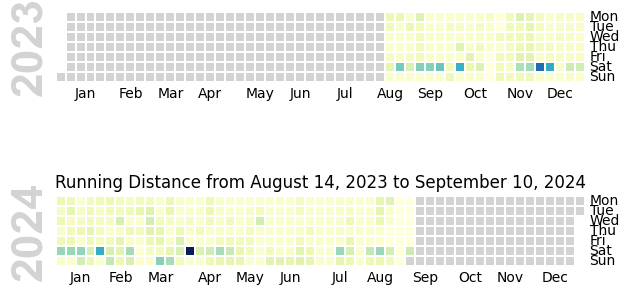

In [67]:
import calmap
# Function to plot calendar heatmap with annotations
def plot_calendar_with_sum(df, title):
    df.set_index('Date', inplace=True)
    df_series = df['Distance'].resample('D').sum().fillna(0)  # Resample to ensure all days are present
    
    # Plot the calendar heatmap
    plt.figure(figsize=(12, 6))
    ax = calmap.calendarplot(df_series, cmap='YlGnBu', fillcolor='lightgray', linewidth=0.1)
    plt.title(title)
    
    # Annotate each cell with the distance
    for date, distance in df_series.items():
        if pd.notna(distance):  # Only annotate non-NaN values
            # Get the calendar grid location for this date
            day_of_year = date.dayofyear
            year_start = pd.Timestamp(date.year, 1, 1)
            ax[0].annotate(f'{int(distance)}', 
                           (date - year_start).days // 7, 
                           (date - year_start).days % 7, 
                           ha='center', va='center', color='black')
    
    plt.show()

# Plot the two heatmaps separately
#plot_calendar_with_sum(df_range_1, 'Running Distance from July 14, 2022 to April 28, 2023')
plot_calendar_with_sum(df_test, 'Running Distance from August 14, 2023 to September 10, 2024')

In [35]:
!pip install calmap

You should consider upgrading via the 'c:\users\saral\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
